In [1]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Load and Resize Image

(85, 128)


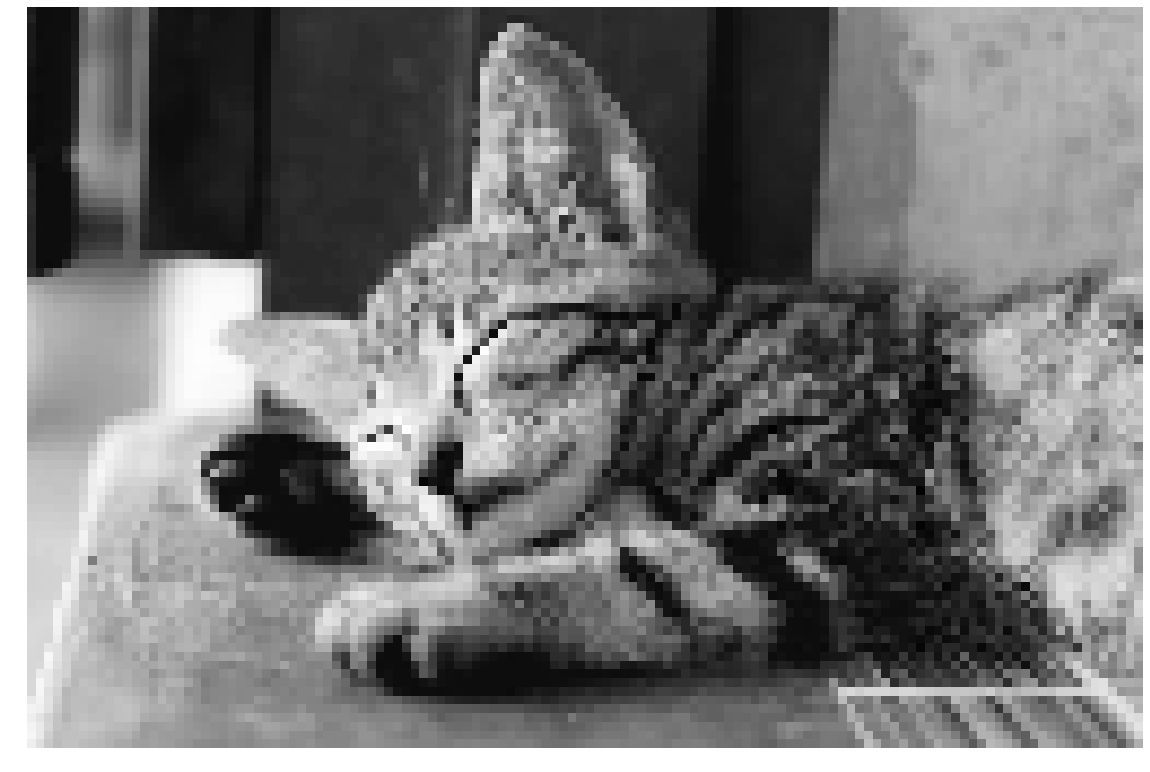

In [2]:
img_path = 'img/09.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, dsize=None, fx=0.2, fy=0.2)

print(img.shape)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img, cmap='gray')

# Preview Patch Images

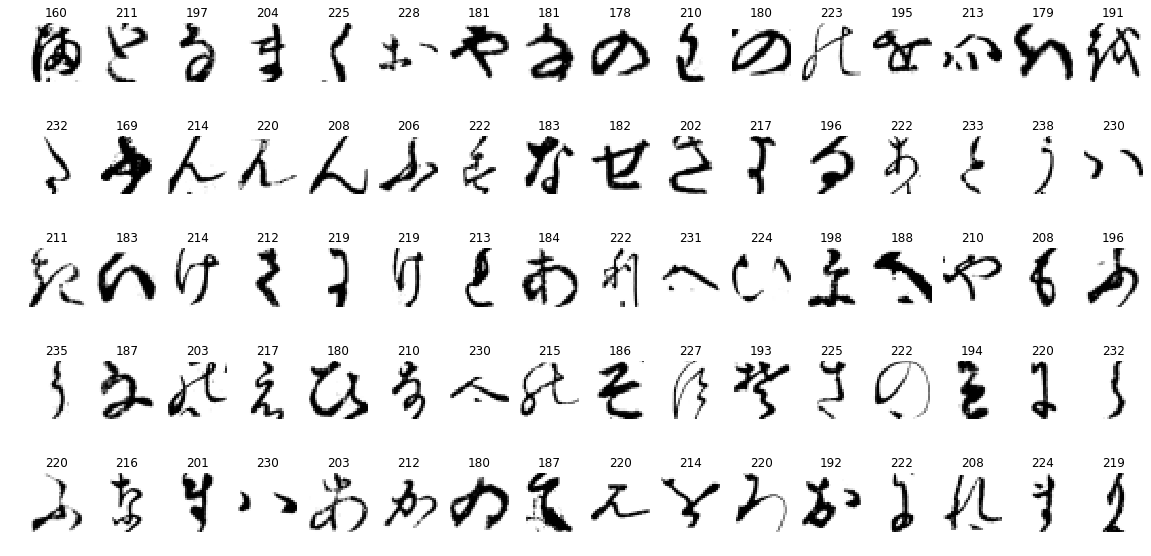

In [3]:
sample_imgs = np.load('dataset/k49-train-imgs.npz')['arr_0']

plt.figure(figsize=(20, 10))
for i in range(80):
    img_patch = 255 - sample_imgs[i]

    plt.subplot(5, 16, i+1)
    plt.title(int(np.mean(img_patch)))
    plt.axis('off')
    plt.imshow(img_patch, cmap='gray')

# Distribution of Patch Images

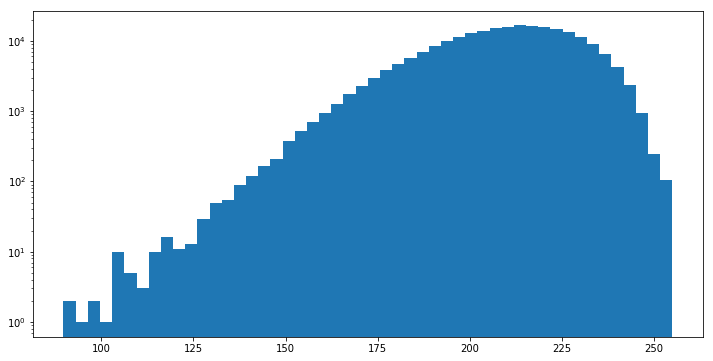

In [4]:
means = np.mean(255 - sample_imgs, axis=(1, 2))

plt.figure(figsize=(12, 6))
plt.hist(means, bins=50, log=True)
plt.show()

# Adjust MinMax of Input Image

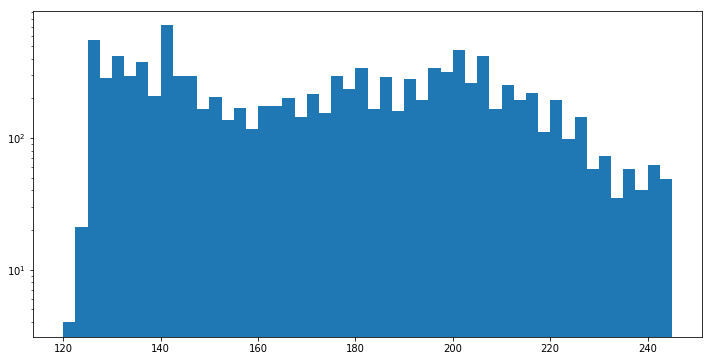

In [5]:
img = cv2.normalize(img, dst=None, alpha=120, beta=245, norm_type=cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))
plt.hist(img.flatten(), bins=50, log=True)
plt.show()

# Organize Patch Images

In [6]:
bins = defaultdict(list)

for img_patch, mean in zip(sample_imgs, means):
    bins[int(mean)].append(img_patch)
    
print(len(bins))

156


# Fill Images

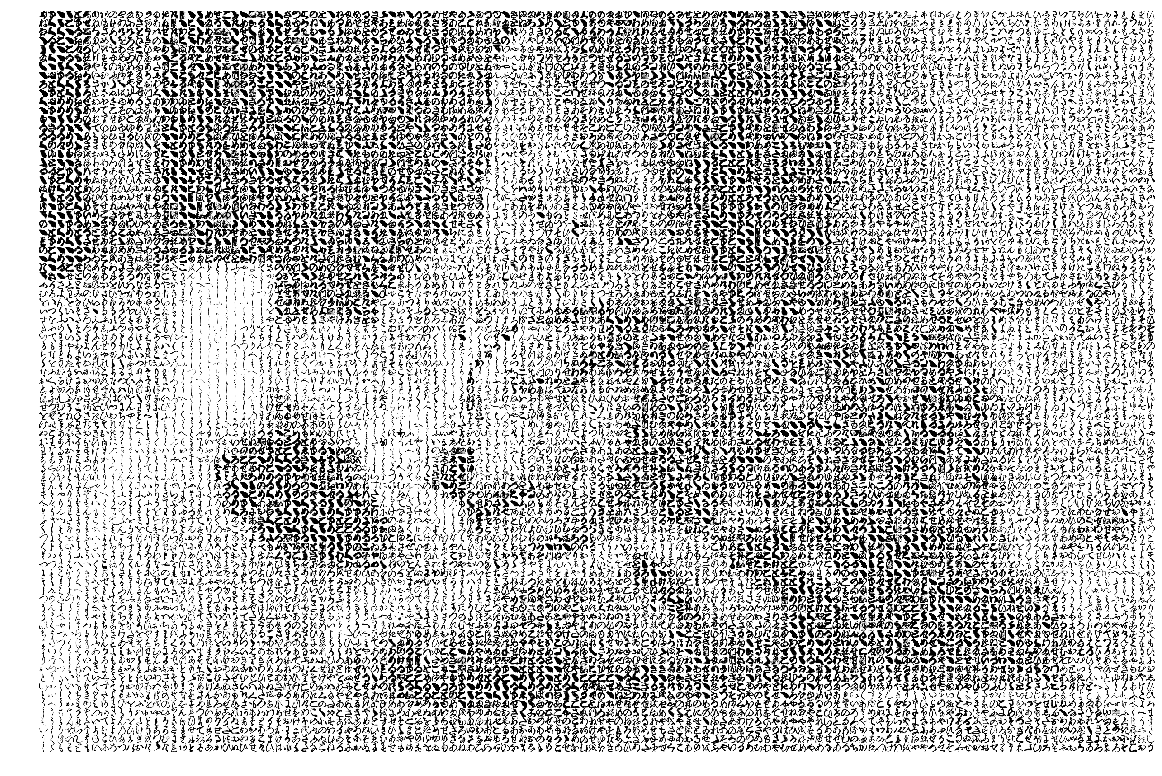

In [7]:
h, w = img.shape

img_out = np.zeros((h*28, w*28), dtype=np.uint8)

for y in range(h):
    for x in range(w):
        level = img[y, x]

        b = bins[level]

        while len(b) == 0:
            level += 1
            b = bins[level]

        img_patch = 255 - b[np.random.randint(len(b))]

        img_out[y*28:(y+1)*28, x*28:(x+1)*28] = img_patch
        
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img_out, cmap='gray')

_ = cv2.imwrite('result/%s_bw.jpg' % os.path.splitext(os.path.basename(img_path))[0], img_out)